In [2]:
from ultralytics import YOLO
from huggingface_hub import snapshot_download
from pathlib import Path
import glob, os
import cv2
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns



# Rutas base (ajustalas a tu compu)
BASE_DIR = Path(r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final")
DATASETS_DIR = BASE_DIR / "Datasets"
MODELS_DIR = BASE_DIR / "Models"

MODELS_DIR.mkdir(exist_ok=True)

c:\ProgramData\miniconda3\envs\dlfcv2025\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Descargo modelo hf y yolov8

In [3]:
local_dir = snapshot_download(repo_id="uisikdag/yolo-v8-football-players-detection")

weights = list(Path(local_dir).rglob("*.pt"))
print("Pesos encontrados:", weights)

# Guardamos el modelo principal en MODELS_DIR
hf_model_path = MODELS_DIR / "hf_football.pt"
hf_model_path.write_bytes(Path(weights[0]).read_bytes())

print("Modelo copiado en:", hf_model_path)

YOLO("yolov8n.pt")

Invalid model-index. Not loading eval results into CardData.
Fetching 6 files: 100%|██████████| 6/6 [00:00<?, ?it/s]


Pesos encontrados: [WindowsPath('C:/Users/Administrator/.cache/huggingface/hub/models--uisikdag--yolo-v8-football-players-detection/snapshots/01c4d0e18813ac75a2c73cc35145bc240af85342/best.pt')]
Modelo copiado en: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Models\hf_football.pt


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [10]:
# === MODELOS DISPONIBLES ===
MODELS = {
    "hf_football": MODELS_DIR / "hf_football.pt",
    "finetune_football": MODELS_DIR / "football_finetune.pt",
    "hf_Nacional": MODELS_DIR / "hf_Nacional.pt",
    "finetune_Nacional": MODELS_DIR / "Nacional_finetune.pt",
    "YOLOv8": MODELS_DIR / "yolov8n.pt",
}
# === DATASETS DISPONIBLES ===
DATASETS = {
    "football1": DATASETS_DIR / "football1/data.yaml",
    "Nacional": DATASETS_DIR / "Nacional1/data.yaml",
}

print("Modelos:", MODELS)
print("Datasets:", DATASETS)

Modelos: {'hf_football': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/hf_football.pt'), 'finetune_football': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/football_finetune.pt'), 'hf_Nacional': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/hf_Nacional.pt'), 'finetune_Nacional': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/Nacional_finetune.pt'), 'YOLOv8': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Models/yolov8n.pt')}
Datasets: {'football1': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Datasets/football1/data.yaml'), 'Nacional': WindowsPath('C:/Users/Administrator/Documents/Maestria/Computer Vision - 2do sem/Proyecto Final/Datasets/Nacional1/data.yaml')}


# FINE TUNING con dataset de Roboflow con imagenes similares a las del futbol uruguayo

In [ ]:
model = YOLO(MODELS["hf_football"])

data_yaml = DATASETS["football1"]

model.train(
    data=data_yaml,
    epochs=30,
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="football_rf",
    workers=2
)

In [28]:
model = YOLO(MODELS["hf_football"])

data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

results_train = model.train(
    data=data_yaml,
    epochs=10,          
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="Nacional_v2",
    workers=2,
    verbose=True,       # imprime info de cada época
    plots=True          # guarda curvas y métricas
)

New https://pypi.org/project/ultralytics/8.3.231 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\A

In [ ]:
best_weights = BASE_DIR / "runs_finetune/Nacional_v2/weights/best.pt"
best_model = YOLO(best_weights)

metrics = best_model.val(
    data=data_yaml,
    split="test",   
    plots=True
)

print(metrics.results_dict)

Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 69.828.3 MB/s, size: 38.4 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 1.6Kit/s 0.1s
val: New cache created: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7s/it 21.9s3.0ss
                   all        127       1422      0.821      0.694      0.759      0.357
                  Ball        100        101      0.855      0.466      0.611      0.288
            Goalkeeper         50         50      0.877       0.64      0.719    

In [ ]:
model = YOLO(MODELS["finetune_football"])


data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

results_train = model.train(
    data=data_yaml,
    epochs=10,          
    imgsz=640,
    batch=16,
    project=str(BASE_DIR / "runs_finetune"),
    name="Nacional_v3",
    workers=2,
    verbose=True,       # imprime info de cada época
    plots=True,
    lr0=0.001
)

New https://pypi.org/project/ultralytics/8.3.232 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\

In [8]:
from pathlib import Path

best_weights_nac = BASE_DIR / "runs_finetune/Nacional_v3/weights/best.pt"
model_nac = YOLO(best_weights_nac)

data_yaml = r"C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\data.yaml"

metrics_nac_test = model_nac.val(
    data=str(data_yaml),
    split="test",     # muy importante: usamos TEST
    plots=True        # PR curves, F1 curve, confusion matrix, etc.
)

print(metrics_nac_test.results_dict)

Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 724.5138.3 MB/s, size: 35.6 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional_Train\test\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 9.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7s/it 21.6s3.0ss
                   all        127       1422      0.594      0.676       0.67      0.317
                  Ball        100        101      0.513      0.584      0.538      0.267
            Goalkeeper         50         50      0.417      0.716      0.659      0.311
                Player        127       1157       0.73      0.975      0.941      0.449
               Referee         83        114

# Resultados


In [11]:
resultados = []

for model_name, model_path in MODELS.items():
    model = YOLO(model_path)

    for ds_name, ds_yaml in DATASETS.items():
        print(f"\nEvaluando modelo {model_name} en dataset {ds_name}")
        metrics = model.val(data=str(ds_yaml), split="test")

        d = metrics.results_dict
        d["model"] = model_name
        d["dataset"] = ds_name
        resultados.append(d)

df = pd.DataFrame(resultados)
print(df)

df.to_csv(BASE_DIR / "resultados_globales.csv", index=False)
print("Resultados guardados.")


Evaluando modelo hf_football en dataset football1
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 135.539.6 MB/s, size: 44.9 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126 124.6Kit/s 0.0s
val: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\sample_733_jpg.rf.f88b9692641194edf8f7aee7d454700a.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.1s/it 32.5s4.4ss
                   all        126       1773     0.0777      0.316     0.0647     0.0305
                  ball         20         20          0       

In [12]:
cols = ["model", "dataset", 
        "metrics/precision(B)", 
        "metrics/recall(B)", 
        "metrics/mAP50(B)",
        "metrics/mAP50-95(B)"]

display(df[cols])

,model,dataset,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B)
0,hf_football,football1,0.077702,0.316488,0.064682,0.030547
1,hf_football,Nacional,0.267281,0.210989,0.184028,0.066973
2,finetune_football,football1,0.860073,0.815246,0.840791,0.547005
3,finetune_football,Nacional,0.097075,0.262036,0.064161,0.029629
4,hf_Nacional,football1,0.078741,0.710828,0.137053,0.065758
5,hf_Nacional,Nacional,0.849536,0.714112,0.779903,0.377642
6,finetune_Nacional,football1,0.277887,0.525463,0.260192,0.128156
7,finetune_Nacional,Nacional,0.578987,0.664720,0.658254,0.322228
8,YOLOv8,football1,0.761128,0.012500,0.047259,0.027222
9,YOLOv8,Nacional,0.007748,0.135042,0.004349,0.001437


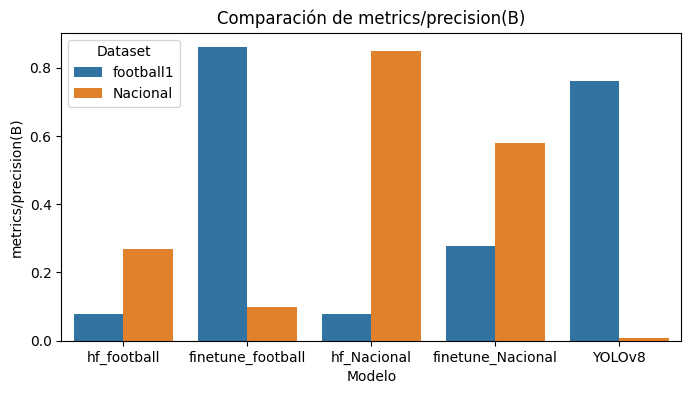

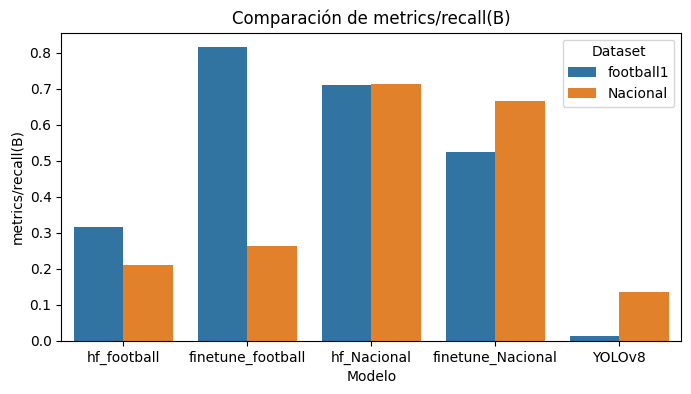

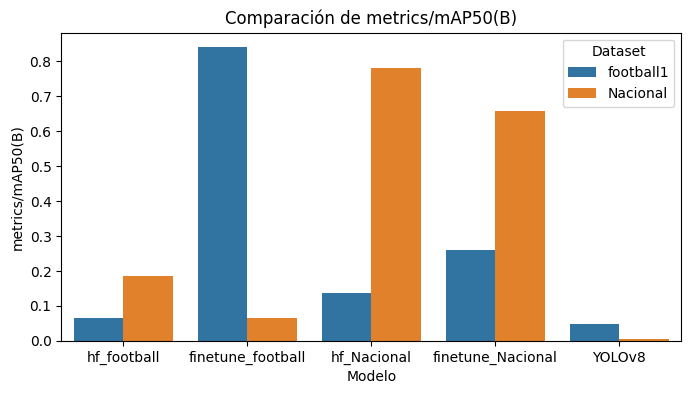

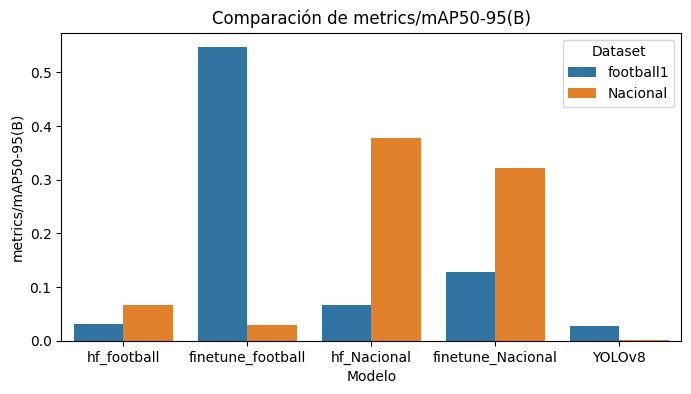

In [13]:
metrics_to_plot = [
    "metrics/precision(B)", 
    "metrics/recall(B)", 
    "metrics/mAP50(B)", 
    "metrics/mAP50-95(B)"
]

for metric in metrics_to_plot:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df, x="model", y=metric, hue="dataset")
    plt.title(f"Comparación de {metric}")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.legend(title="Dataset")
    plt.show()

In [16]:
for model_name, model_path in MODELS.items():
    model = YOLO(model_path)
    for ds_name, ds_yaml in DATASETS.items():
        print(f"PR Curve → Modelo {model_name} | Dataset {ds_name}")
        metrics = model.val(data=str(ds_yaml), split="test", plots=True)

PR Curve → Modelo hf_football | Dataset football1
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 82.342.2 MB/s, size: 44.6 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126  0.0s
val: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\sample_733_jpg.rf.f88b9692641194edf8f7aee7d454700a.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 7.6s/it 1:01<8.2sss
                   all        126       1773     0.0777      0.316     0.0647     0.0305
                  ball         20         20          0          0       

In [20]:
for model_name, model_path in MODELS.items():
    model = YOLO(model_path)
    for ds_name, ds_yaml in DATASETS.items():
        print(f"Confusion matrix → Modelo {model_name} | Dataset {ds_name}")
        model.val(data=str(ds_yaml), split="test", plots=True)

Confusion matrix → Modelo hf_football | Dataset football1
Ultralytics 8.3.228  Python-3.10.18 torch-2.2.2+cpu CPU (13th Gen Intel Core i5-1335U)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.40.5 ms, read: 59.820.6 MB/s, size: 57.3 KB)
val: Scanning C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126 26.8Kit/s 0.0s
val: C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\sample_733_jpg.rf.f88b9692641194edf8f7aee7d454700a.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 7.1s/it 57.0s7.9sss
                   all        126       1773     0.0777      0.316     0.0647     0.0305
                  ball         20         20          0 

In [23]:
from ultralytics.utils.metrics import ConfusionMatrix

def visualizar_errores(model, ds_yaml, outdir):
    results = model.val(data=str(ds_yaml), split="test")
    cm = results.confusion_matrix  # matriz YOLO
    # No hay método directo FP/FN → lo estimamos del confusion matrix

    # FP = sum(row except diagonal)
    # FN = sum(column except diagonal)

    print("FP por clase:", cm.matrix.sum(axis=1) - np.diag(cm.matrix))
    print("FN por clase:", cm.matrix.sum(axis=0) - np.diag(cm.matrix))

    # YOLO guarda imágenes de errores en:
    # runs/detect/val*/labels.jpg
    print("Errores visuales guardados en carpeta de val")

In [24]:
model = YOLO(MODELS["hf_football"])
results = model.predict(source=str(DATASETS_DIR / "football1/test/images"), save=True)


image 1/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\40cd38_7_6_png_jpg.rf.50f66d3a35b5a9e3588220a428eddc2f.jpg: 800x800 1 goalkeeper, 20 players, 2 referees, 478.9ms
image 2/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_1_5_png_jpg.rf.1b7af80cc1909948338dbb43811fc28f.jpg: 800x800 1 goalkeeper, 22 players, 2 referees, 315.9ms
image 3/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.3c0f38315774c3cccbc0d93d3672086b.jpg: 800x800 1 goalkeeper, 22 players, 1 referee, 265.5ms
image 4/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.70e9f84345dac76fea0842904768d151.jpg: 800x800 1 goalkeeper, 22 players, 1 referee, 255.2ms
image 5/126 C:\Users\Administrator\Docume

In [25]:
model = YOLO(MODELS["finetune_football"])
results = model.predict(source=str(DATASETS_DIR / "football1/test/images"), save=True)


image 1/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\40cd38_7_6_png_jpg.rf.50f66d3a35b5a9e3588220a428eddc2f.jpg: 640x640 1 referee, 20 players, 201.3ms
image 2/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_1_5_png_jpg.rf.1b7af80cc1909948338dbb43811fc28f.jpg: 640x640 1 goalkeeper, 1 ball, 2 referees, 23 players, 169.9ms
image 3/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.3c0f38315774c3cccbc0d93d3672086b.jpg: 640x640 1 goalkeeper, 1 referee, 19 players, 179.5ms
image 4/126 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\football1\test\images\42ba34_5_5_png_jpg.rf.70e9f84345dac76fea0842904768d151.jpg: 640x640 1 goalkeeper, 1 referee, 19 players, 175.7ms
image 5/126 C:\Users\Administrator\Documents\Mae

In [26]:
model = YOLO(MODELS["hf_football"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 800x800 6 players, 1 referee, 272.7ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 800x800 1 goalkeeper, 19 players, 239.9ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 800x800 9 players, 256.5ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 800x800 5 players, 1 referee, 248.3ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto F

In [27]:
model = YOLO(MODELS["finetune_football"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 ball, 4 players, 204.3ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 1 ball, 15 players, 197.7ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 players, 196.4ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 14 players, 200.6ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Naci

In [14]:
model = YOLO(MODELS["finetune_Nacional"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 Ball, 4 Players, 310.9ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 2 Balls, 2 Goalkeepers, 15 Players, 194.0ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 Players, 166.3ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 15 Players, 163.4ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Fin

In [15]:
model = YOLO(MODELS["hf_Nacional"])
results = model.predict(source=str(DATASETS_DIR / "Nacional1/test/images"), save=True)


image 1/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.be8397dad24ca861579c867dfb3d5255.jpg: 640x640 1 Ball, 5 Players, 201.1ms
image 2/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\-_jpg.rf.d38ae0d83d1763dd46eee4a2a96486e4.jpg: 640x640 17 Players, 1 Referee, 174.4ms
image 3/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191218_jpg.rf.132e2a7bac0210f9b3535bb546872b80.jpg: 640x640 13 Players, 3 Referees, 174.2ms
image 4/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\Proyecto Final\Datasets\Nacional1\test\images\Captura-de-pantalla-2025-11-14-191259_jpg.rf.d2e4b2cb62de666c2523b1d4b58dad17.jpg: 640x640 13 Players, 2 Referees, 169.2ms
image 5/345 C:\Users\Administrator\Documents\Maestria\Computer Vision - 2do sem\P

# Pruebas Rapidas de Concepto 

In [ ]:
model = YOLO(MODELS["hf_football"])

results = model.predict(
    source="image/prueba9.jpg",
    conf=0.35,
    save=False
)

out_dir = BASE_DIR / "runs_custom_vis"
out_dir.mkdir(exist_ok=True)

for i, r in enumerate(results):
    img_draw = r.plot(
        line_width=1,
        font_size=0.4,
        labels=True,
        conf=True
    )
    out_path = out_dir / f"custom_{i}.jpg"
    cv2.imwrite(str(out_path), img_draw)

print("Guardado en:", out_dir)